In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
tumor = os.listdir('C:/Users/agamb/Desktop/Project/Brain Tumor Data Set/Brain Tumor')
no_tumor = os.listdir('C:/Users/agamb/Desktop/Project/Brain Tumor Data Set/Healthy')

In [4]:
number_tumor = len(tumor)
print("Number of Tumor Images: ",number_tumor)
number_no_tumor = len(no_tumor)
print("Number of Non-Tumor Images: ",number_no_tumor)

Number of Tumor Images:  2513
Number of Non-Tumor Images:  2087


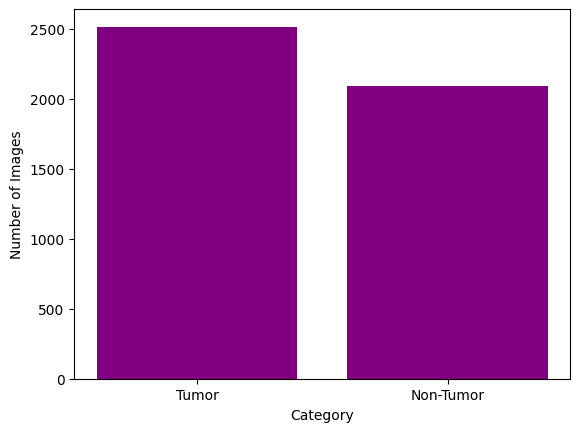

In [5]:
data = {'Tumor' : number_tumor, 'Non-Tumor' : number_no_tumor}
x = data.keys()
values = data.values()
plt.bar(x,values,color='purple')
plt.ylabel('Number of Images')
plt.xlabel('Category')
plt.tight_layout
plt.show()

In [6]:
# import imutils
# # def crop_brain_tumor(image,plot=False):
# #   gray = cv2.cvtColor(image, cv2.COLOR_BAYER_BG2GRAY)
# #   gray = cv2.GaussianBlur(gray,(5,5),0)

# #   thres = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
# #   thres = cv2.erode(thres, None, Iteration=2)
# #   thres = cv2.dilate(thres, None, Iteration=2)

# #   cnts = cv2.findContours(thres.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# #   cnts = imutils.grab_contours(cnts)
# #   c = max(cnts, key = cv2.contourArea)

# #   extLeft = tuple(c[c[:,:,0].argmin()][0])
# #   extRight = tuple(c[c[:,:,0].argmax()][0])
# #   extTop = tuple(c[c[:,:,1].argmin()][0])
# #   extBot = tuple(c[c[:,:,1].argmax()][0])

# #   new_image = image[extTop[1]:extBot[1],extLeft[0]:extRight[0]]
# def crop_brain_tumor(image, plot=False):
#     if image is None:
#         raise ValueError("Image is None. Check the file path.")

#     gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     gray = cv2.GaussianBlur(gray, (5, 5), 0)

#     thres = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
#     thres = cv2.erode(thres, None, iterations=2)
#     thres = cv2.dilate(thres, None, iterations=2)

#     cnts, _ = cv2.findContours(thres.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#     if not cnts:
#         raise ValueError("No contours found")

#     c = max(cnts, key=cv2.contourArea)
#     x, y, w, h = cv2.boundingRect(c)
#     crop = image[y:y + h, x:x + w]

#     if plot:
#         import matplotlib.pyplot as plt
#         plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
#         plt.title("Cropped Tumor Region")
#         plt.axis("off")
#         plt.show()

#     return crop


In [7]:
# img = cv2.imread('C:\\Users\\agamb\\Desktop\\Project\\Brain Tumor Data Set\\Brain Tumor\\Cancer (1).jpg')

# crop_brain_tumor(img, True)

In [8]:
# import os
# import cv2
# import numpy as np
# from sklearn.utils import shuffle

# def load_data(dir_list, image_size):
#     X = []
#     y = []

#     image_width, image_height = image_size
#     for directory in dir_list:
#         for filename in os.listdir(directory):
#             image_path = os.path.join(directory, filename)
#             image = cv2.imread(image_path)

#             if image is None:
#                 continue  

#             image = crop_brain_tumor(image, plot=False)
#             image = cv2.resize(image, dsize=(image_width, image_height), interpolation=cv2.INTER_CUBIC)
#             image = image / 255.0
#             X.append(image)

#             if 'yes' in directory.lower():
#                 y.append(1)
#             else:
#                 y.append(0)

#     X = np.array(X,dtype=np.float32)
#     y = np.array(y,dtype=np.float32)
#     X, y = shuffle(X, y)
    
#     print(f"Number of examples: {len(X)}")
#     print(f"X shape: {X.shape}")
#     print(f"Y shape: {y.shape}")
    
#     return X, y


In [9]:
# tumor_path = 'C:/Users/agamb/Desktop/Project/Brain Tumor Data Set/Brain Tumor'
# no_tumor_path = 'C:/Users/agamb/Desktop/Project/Brain Tumor Data Set/Healthy'
# IMAGE_WIDTH, IMAGE_HEIGHT = (128, 128)

# X, y = load_data([tumor_path, no_tumor_path], (IMAGE_WIDTH, IMAGE_HEIGHT))

In [10]:
# original_dataset_tumor = os.path.join('C:/Users/agamb/Desktop/Project/Brain Tumor Data Set/Brain Tumor')
# original_dataset_no = os.path.join('C:/Users/agamb/Desktop/Project/Brain Tumor Data Set/Healthy')

In [11]:
# train_datagen = ImageDataGenerator(
#     rescale=1.0/255,
#     horizontal_flip=True,         
#     vertical_flip=True,           
#     rotation_range=40,
#     shear_range=0.2,
#     width_shift_range=0.4,
#     height_shift_range=0.4,
#     fill_mode='nearest',
#     validation_split=0.2         
# )

# valid_data_gen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)
# test_data_gen = ImageDataGenerator(rescale=1.0/255)


In [12]:
# train_datagenerator = train_datagen.flow_from_directory('Brain Tumor Data Set',   
#     target_size=(150, 150),        
#     batch_size=64,
#     class_mode='binary',      
#     subset='training',
#     shuffle=True,
#     seed=42
# )

In [13]:
# validation_generator = train_datagen.flow_from_directory(
#     'Brain Tumor Data Set',
#     target_size=(150, 150),
#     batch_size=64,
#     class_mode='binary',
#     subset='validation',
#     shuffle=True,
#     seed=42
# )

In [14]:
# print(train_datagenerator.class_indices)
# print(train_datagenerator.samples)
# print(validation_generator.samples)

In [15]:
# batch_x, batch_y = next(train_datagenerator)
# print("Batch Y unique labels:", np.unique(batch_y))

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# ✅ Paths (Make sure these folder names are exactly correct)
data_path = "C:/Users/agamb/Desktop/Project/Brain Tumor Data Set"

# --- Image Augmentation & Normalization ---
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # ✅ 20% Validation split
)

# --- Training Data ---
train_generator = train_datagen.flow_from_directory(
    directory=data_path,
    target_size=(150, 150),
    batch_size=16,
    class_mode='binary',
    subset='training',
    shuffle=True,
    seed=42
)

# --- Validation Data ---
val_generator = train_datagen.flow_from_directory(
    directory=data_path,
    target_size=(150, 150),
    batch_size=16,
    class_mode='binary',
    subset='validation',
    shuffle=True,
    seed=42
)

# ✅ Check if both classes are detected
print("\nClass Indices:", train_generator.class_indices)
print("Training Samples:", train_generator.samples)
print("Validation Samples:", val_generator.samples)

# ✅ Quick check of labels distribution
y_train_batch = []
for i in range(len(train_generator)):
    _, y_batch = next(train_generator)
    y_train_batch.extend(y_batch)
y_train_batch = np.array(y_train_batch)

print("\nUnique labels in Training Data:", np.unique(y_train_batch, return_counts=True))


Found 3681 images belonging to 2 classes.
Found 919 images belonging to 2 classes.

Class Indices: {'Brain Tumor': 0, 'Healthy': 1}
Training Samples: 3681
Validation Samples: 919

Unique labels in Training Data: (array([0., 1.], dtype=float32), array([2011, 1670]))


In [17]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
# from tensorflow.keras.optimizers import Adam    

# model = Sequential([
#     Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
#     BatchNormalization(),
#     MaxPooling2D(2, 2),

#     Conv2D(64, (3,3), activation='relu'),
#     BatchNormalization(),
#     MaxPooling2D(2, 2),

#     Conv2D(128, (3,3), activation='relu'),
#     BatchNormalization(),
#     MaxPooling2D(2, 2),

#     Flatten(),
#     Dense(256, activation='relu'),
#     Dropout(0.5),
#     Dense(1, activation='sigmoid')  # binary classification
# ])


In [18]:
# model.compile(optimizer=Adam(learning_rate=0.001),
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

In [19]:
# from sklearn.utils.class_weight import compute_class_weight
# import numpy as np

# class_weights = compute_class_weight(
#     class_weight='balanced',
#     classes=np.unique(train_generator.classes),
#     y=train_generator.classes
# )
# class_weights = dict(enumerate(class_weights))
# print("Class Weights:", class_weights)

# history = model.fit(
#     train_generator,
#     epochs=10,
#     validation_data=val_generator,
#     class_weight=class_weights
# )


In [20]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# --- Load VGG19 with pretrained weights ---
vgg = VGG19(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# --- Freeze base layers (so pretrained features remain intact) ---
for layer in vgg.layers:
    layer.trainable = False

# --- Add custom classification layers ---
x = vgg.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

# --- Final Model ---
model_vgg19 = Model(inputs=vgg.input, outputs=predictions)

# --- Compile ---
model_vgg19.compile(optimizer=Adam(learning_rate=0.0001),
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

# --- Train ---
history_vgg19 = model_vgg19.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50
)

# --- Evaluate ---
val_loss, val_acc = model_vgg19.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc*100:.2f}%")


Epoch 1/50


c:\Users\agamb\Desktop\Brain_Tumor\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


231/231 ━━━━━━━━━━━━━━━━━━━━ 153s 657ms/step - accuracy: 0.5369 - loss: 0.7164 - val_accuracy: 0.6279 - val_loss: 0.6231
Epoch 2/50
231/231 ━━━━━━━━━━━━━━━━━━━━ 148s 640ms/step - accuracy: 0.6724 - loss: 0.6094 - val_accuracy: 0.6801 - val_loss: 0.5818
Epoch 3/50
231/231 ━━━━━━━━━━━━━━━━━━━━ 169s 731ms/step - accuracy: 0.7223 - loss: 0.5592 - val_accuracy: 0.6975 - val_loss: 0.5682
Epoch 4/50
231/231 ━━━━━━━━━━━━━━━━━━━━ 155s 672ms/step - accuracy: 0.7424 - loss: 0.5269 - val_accuracy: 0.7127 - val_loss: 0.5511
Epoch 5/50
231/231 ━━━━━━━━━━━━━━━━━━━━ 149s 647ms/step - accuracy: 0.7526 - loss: 0.5140 - val_accuracy: 0.7301 - val_loss: 0.5273
Epoch 6/50
231/231 ━━━━━━━━━━━━━━━━━━━━ 153s 661ms/step - accuracy: 0.7564 - loss: 0.4909 - val_accuracy: 0.7367 - val_loss: 0.5282
Epoch 7/50
231/231 ━━━━━━━━━━━━━━━━━━━━ 150s 652ms/step - accuracy: 0.7659 - loss: 0.4856 - val_accuracy: 0.7454 - val_loss: 0.5197
Epoch 8/50
231/231 ━━━━━━━━━━━━━━━━━━━━ 156s 675ms/step - accuracy: 0.7765 - loss: 0.47

In [30]:
# model_vgg19.evaluate(val_generator)

In [23]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load and preprocess the image
img = image.load_img('./Brain Tumor Data Set/Brain Tumor/Cancer (198).jpg', target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension


In [24]:
prediction = model_vgg19.predict(img_array)

# Binary classification (0: No Tumor, 1: Tumor)
if prediction[0][0] > 0.5:
    print("Tumor Detected")
else:
    print("No Tumor Detected")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
No Tumor Detected


In [25]:
# model.save('brain_tumor_model.h5')  

58/58 ━━━━━━━━━━━━━━━━━━━━ 32s 559ms/step


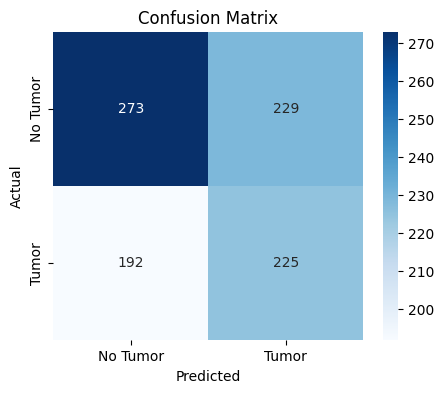


Classification Report:

              precision    recall  f1-score   support

    No Tumor       0.59      0.54      0.56       502
       Tumor       0.50      0.54      0.52       417

    accuracy                           0.54       919
   macro avg       0.54      0.54      0.54       919
weighted avg       0.55      0.54      0.54       919



In [26]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get true labels
true_labels = val_generator.classes

# Get predictions
pred_probs = model_vgg19.predict(val_generator)
pred_labels = (pred_probs > 0.5).astype(int).reshape(-1)

# Confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Tumor', 'Tumor'],
            yticklabels=['No Tumor', 'Tumor'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("\nClassification Report:\n")
print(classification_report(true_labels, pred_labels, target_names=['No Tumor', 'Tumor']))


231/231 ━━━━━━━━━━━━━━━━━━━━ 121s 524ms/step


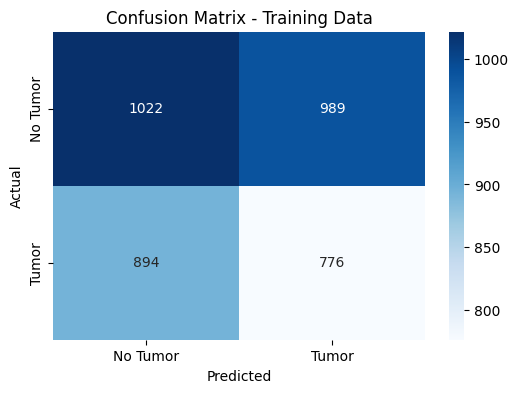

Training Data Classification Report:
              precision    recall  f1-score   support

    No Tumor       0.53      0.51      0.52      2011
       Tumor       0.44      0.46      0.45      1670

    accuracy                           0.49      3681
   macro avg       0.49      0.49      0.49      3681
weighted avg       0.49      0.49      0.49      3681

58/58 ━━━━━━━━━━━━━━━━━━━━ 31s 540ms/step


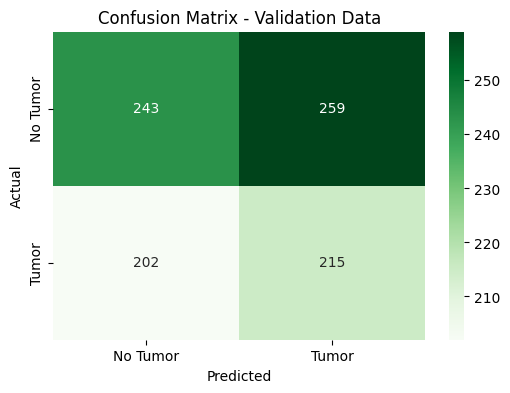

Validation Data Classification Report:
              precision    recall  f1-score   support

    No Tumor       0.55      0.48      0.51       502
       Tumor       0.45      0.52      0.48       417

    accuracy                           0.50       919
   macro avg       0.50      0.50      0.50       919
weighted avg       0.50      0.50      0.50       919



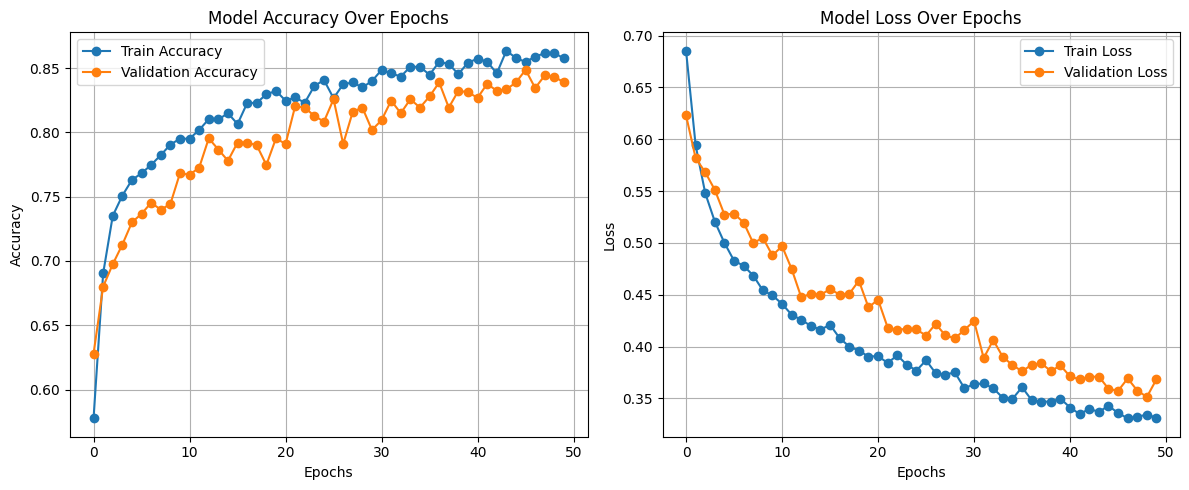

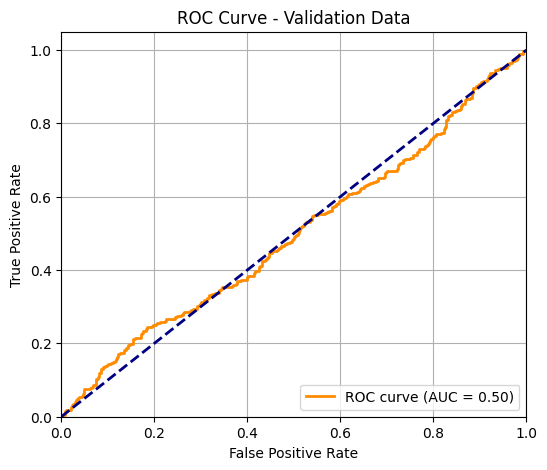

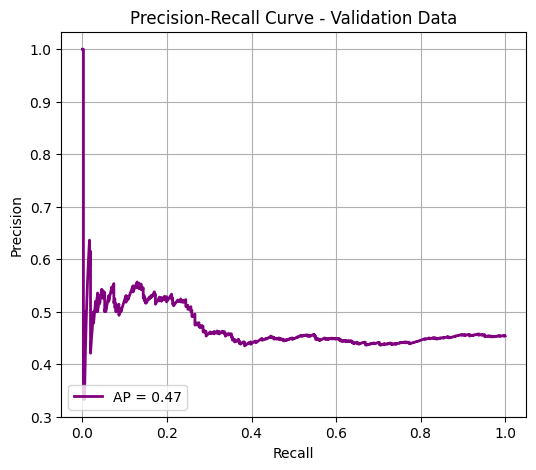

In [22]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix, classification_report

# # ---- Confusion Matrix for Training Data ----
# y_train_true = train_datagenerator.classes
# y_train_pred_probs = model.predict(train_datagenerator)
# y_train_pred = (y_train_pred_probs > 0.5).astype(int).reshape(-1)

# cm_train = confusion_matrix(y_train_true, y_train_pred)

# plt.figure(figsize=(6,4))
# sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
#             xticklabels=['No Tumor', 'Tumor'],
#             yticklabels=['No Tumor', 'Tumor'])
# plt.title('Confusion Matrix - Training Data')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()

# print("Training Data Classification Report:")
# print(classification_report(y_train_true, y_train_pred, target_names=['No Tumor', 'Tumor']))

# # ---- Confusion Matrix for Testing (Validation) Data ----
# y_val_true = validation_generator.classes
# y_val_pred_probs = model.predict(validation_generator)
# y_val_pred = (y_val_pred_probs > 0.5).astype(int).reshape(-1)

# cm_val = confusion_matrix(y_val_true, y_val_pred)

# plt.figure(figsize=(6,4))
# sns.heatmap(cm_val, annot=True, fmt='d', cmap='Greens',
#             xticklabels=['No Tumor', 'Tumor'],
#             yticklabels=['No Tumor', 'Tumor'])
# plt.title('Confusion Matrix - Validation Data')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()

# print("Validation Data Classification Report:")
# print(classification_report(y_val_true, y_val_pred, target_names=['No Tumor', 'Tumor']))

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, average_precision_score

# ---- Confusion Matrix for Training Data ----
y_train_true = train_generator.classes
y_train_pred_probs = model_vgg19.predict(train_generator)
y_train_pred = (y_train_pred_probs > 0.5).astype(int).reshape(-1)

cm_train = confusion_matrix(y_train_true, y_train_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Tumor', 'Tumor'],
            yticklabels=['No Tumor', 'Tumor'])
plt.title('Confusion Matrix - Training Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Training Data Classification Report:")
print(classification_report(y_train_true, y_train_pred, target_names=['No Tumor', 'Tumor']))

# ---- Confusion Matrix for Validation Data ----
y_val_true = val_generator.classes
y_val_pred_probs = model_vgg19.predict(val_generator)
y_val_pred = (y_val_pred_probs > 0.5).astype(int).reshape(-1)

cm_val = confusion_matrix(y_val_true, y_val_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Tumor', 'Tumor'],
            yticklabels=['No Tumor', 'Tumor'])
plt.title('Confusion Matrix - Validation Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Validation Data Classification Report:")
print(classification_report(y_val_true, y_val_pred, target_names=['No Tumor', 'Tumor']))

# ---- Line Plots for Accuracy and Loss ----
plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history_vgg19.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history_vgg19.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1,2,2)
plt.plot(history_vgg19.history['loss'], label='Train Loss', marker='o')
plt.plot(history_vgg19.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# ---- ROC Curve ----
fpr, tpr, _ = roc_curve(y_val_true, y_val_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Validation Data')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# ---- Precision-Recall Curve ----
precision, recall, _ = precision_recall_curve(y_val_true, y_val_pred_probs)
avg_precision = average_precision_score(y_val_true, y_val_pred_probs)

plt.figure(figsize=(6,5))
plt.plot(recall, precision, color='purple', lw=2, label=f'AP = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Validation Data')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()


In [31]:
model_vgg19.save('brain_tumor_models.h5')  

In [28]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load and preprocess the image
img = image.load_img('2.jpg', target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension


In [29]:
prediction = model_vgg19.predict(img_array)

# Binary classification (0: No Tumor, 1: Tumor)
if prediction[0][0] > 0.5:
    print("Not Tumor Detected")
else:
    print("Tumor Detected")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Not Tumor Detected
